In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

# 資料讀取與處理

In [2]:
df = pd.read_csv('AAPL.csv')
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


- symbol  - 蘋果股票
- close - 收盤價
- high - 當天最高價
- low - 當天最低價
- open - 當天開盤價
- volume - 股票交易量
- adjClose - 相對於其他股票屬性/操作的收盤價
- adjHigh - 相對於其他股票屬性/行為的最高股票價格
- adjOpen - 相對於其他股票屬性/行為的開盤價
- adjVolume - 與其他股票屬性/行為相關的交易量
- divCash - 現金股息
- splitFactor - 股票分割

In [3]:
df.columns

Index(['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open',
       'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',
       'divCash', 'splitFactor'],
      dtype='object')

In [4]:
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [5]:
df['divCash'].unique()

array([0.  , 0.52, 0.57, 0.63, 0.73, 0.77, 0.82])

In [6]:
df[(df['divCash']==0.52)|(df['divCash']==0.63)|(df['divCash']==0.73)|(df['divCash']==0.77)|(df['divCash']==0.82)]

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
50,50,AAPL,2015-08-06 00:00:00+00:00,115.13,116.50,114.115,115.970,52903040,106.574181,107.842371,105.634610,107.351757,52903040,0.52,1.0
114,114,AAPL,2015-11-05 00:00:00+00:00,120.92,122.69,120.180,121.850,39552680,112.415257,114.060767,111.727304,113.279847,39552680,0.52,1.0
175,175,AAPL,2016-02-04 00:00:00+00:00,96.60,97.33,95.190,95.860,46471652,90.289198,90.971507,88.971312,89.597541,46471652,0.52,1.0
494,494,AAPL,2017-05-11 00:00:00+00:00,153.95,154.07,152.310,152.450,25596687,147.538134,147.653136,145.966439,146.100608,25596687,0.63,1.0
557,557,AAPL,2017-08-10 00:00:00+00:00,155.32,160.00,154.630,159.900,39081017,149.454836,153.958111,148.790892,153.861887,39081017,0.63,1.0
622,622,AAPL,2017-11-10 00:00:00+00:00,174.67,175.38,174.270,175.110,25061183,168.680355,169.366009,168.294072,169.105267,25061183,0.63,1.0
683,683,AAPL,2018-02-09 00:00:00+00:00,156.41,157.89,150.240,157.070,66723743,151.654909,153.089915,145.672486,152.294844,66723743,0.63,1.0
746,746,AAPL,2018-05-11 00:00:00+00:00,188.59,190.06,187.450,189.490,26212221,183.564398,184.995225,182.454777,184.440414,26212221,0.73,1.0
809,809,AAPL,2018-08-10 00:00:00+00:00,207.53,209.10,206.670,207.360,24611202,202.710226,204.243763,201.870199,202.544174,24611202,0.73,1.0
872,872,AAPL,2018-11-08 00:00:00+00:00,208.49,210.12,206.750,209.980,25362636,204.360976,205.958695,202.655436,205.821468,25362636,0.73,1.0


In [7]:
df['splitFactor'].unique()

array([1.])

In [8]:
df.columns

Index(['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open',
       'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',
       'divCash', 'splitFactor'],
      dtype='object')

- close - 收盤價
- high - 當天最高價
- low - 當天最低價
- open - 當天開盤價
- divCash - 現金股息
- UD - 漲跌

In [9]:
df_apple = df.drop(['Unnamed: 0', 'symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'splitFactor'],axis=1)
df_apple['date'] = pd.to_datetime([i.split(' ')[0] for i in df_apple['date']])
df_apple['yesterday_open'] = df['open'].shift(1)
df_apple['UD'] = (df['open'] - df_apple['yesterday_open'])*100 / df_apple['yesterday_open'] #漲跌
df_apple = df_apple.dropna()
df_apple = df_apple.set_index('date')
df_apple

,close,high,low,open,volume,divCash,yesterday_open,UD
date,,,,,,,,
2015-05-28,131.780,131.950,131.1000,131.86,30733309,0.0,130.34,1.166181
2015-05-29,130.280,131.450,129.9000,131.23,50884452,0.0,131.86,-0.477779
2015-06-01,130.535,131.390,130.0500,131.20,32112797,0.0,131.23,-0.022861
2015-06-02,129.960,130.655,129.3200,129.86,33667627,0.0,131.20,-1.021341
2015-06-03,130.120,130.940,129.9000,130.66,30983542,0.0,129.86,0.616048
...,...,...,...,...,...,...,...,...
2020-05-18,314.960,316.500,310.3241,313.17,33843125,0.0,300.35,4.268354
2020-05-19,313.140,318.520,313.0100,315.03,25432385,0.0,313.17,0.593927
2020-05-20,319.230,319.520,316.2000,316.68,27876215,0.0,315.03,0.523760


In [10]:
df_apple.columns

Index(['close', 'high', 'low', 'open', 'volume', 'divCash', 'yesterday_open',
       'UD'],
      dtype='object')

# Data visualize

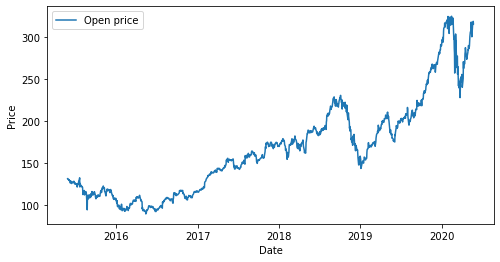

In [11]:
plt.figure(figsize=(8,4))
plt.plot(df_apple.index,df_apple['open'],label='Open price')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Price',fontsize=10)

plt.legend()
plt.show()

# Model building

## ARIMA

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import statsmodels.api as sm

In [13]:
# !pip install statsmodels

### EST

ETS Decomposition Models(error-trend-seasonality)<br>
ETS可將時間序列資料拆成：趨勢、季節性和殘差，讓我們更了解欲分析的資料特性。

Text(0, 0.5, 'Redis')

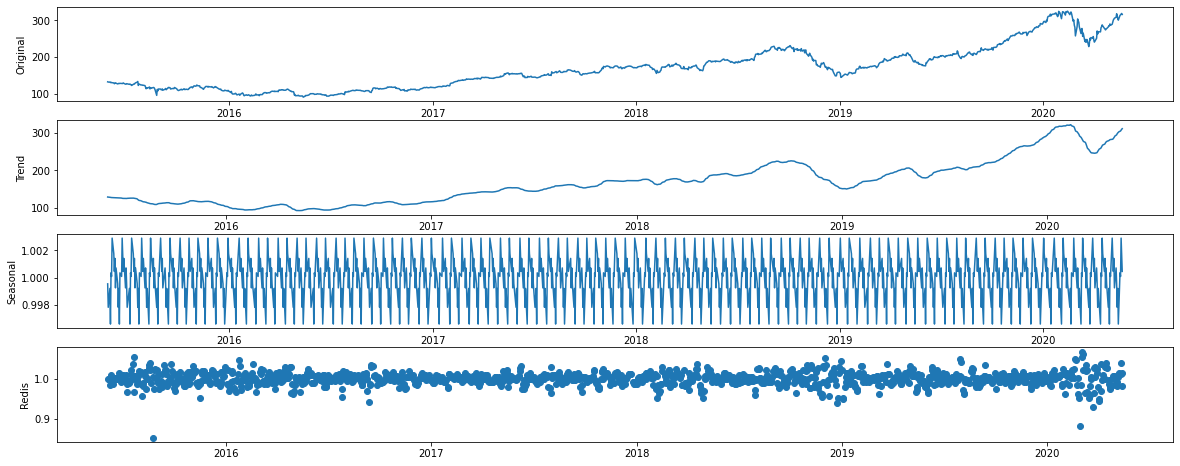

In [14]:
apple_ets = seasonal_decompose(df_apple['open'], model="multiplicative", period=12)

plt.figure(figsize=(20,8))
plt.subplot(4,1,1)
plt.plot(df_apple.index,apple_ets.observed)
plt.ylabel('Original')

plt.subplot(4,1,2)
plt.plot(df_apple.index,apple_ets.trend)
plt.ylabel('Trend')

plt.subplot(4,1,3)
plt.plot(df_apple.index,apple_ets.seasonal)
plt.ylabel('Seasonal')

plt.subplot(4,1,4)
plt.scatter(df_apple.index,apple_ets.resid)
plt.ylabel('Redis')

具季節性

### Dickey Fuller test & ACF & PACF
Dickey Fuller test
- 判斷資料是否平穩(stationary)，如果不平穩，要做差分處理。
- 如果檢驗統計量小於臨界值，我們可以拒絕原假設(也就是序列是平穩的)。 當檢驗統計量大於臨界值時，無法拒絕原假設(這意味著序列不是平穩的)。

In [15]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test\n================================================")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index = [
        "Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Criterical Value (%s)"%key] = value
    print(dfoutput)
    print("================================================")  
    #寫個自動判斷式
    if dfoutput[0] < dfoutput[4]:
        print("The data is stationary. (Criterical Value 1%)")  
    elif dfoutput[0] < dfoutput[5]:
        print("The data is stationary. (Criterical Value 5%)") 
    elif dfoutput[0] < dfoutput[6]:
        print("The data is stationary. (Criterical Value 10%)")
    else:
        print("The data is non-stationary, so do differencing!")
adf_test(df_apple['open'])

Results of Dickey-Fuller Test
Test Statistic                    0.042322
p-value                           0.961895
#Lags Used                       22.000000
Number of Observations Used    1234.000000
Criterical Value (1%)            -3.435660
Criterical Value (5%)            -2.863885
Criterical Value (10%)           -2.568019
dtype: float64
The data is non-stationary, so do differencing!


無法拒絕假設，不是穩態，需做差分。

Results of Dickey-Fuller Test
Test Statistic                -6.455056e+00
p-value                        1.490548e-08
#Lags Used                     2.100000e+01
Number of Observations Used    1.234000e+03
Criterical Value (1%)         -3.435660e+00
Criterical Value (5%)         -2.863885e+00
Criterical Value (10%)        -2.568019e+00
dtype: float64
The data is stationary. (Criterical Value 1%)


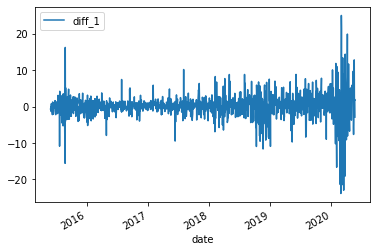

In [16]:
#一階差分 lags:1,12
diff_1 = df_apple['open'] - df_apple['open'].shift(1) 
diff_1 = diff_1.dropna()
diff_1.head()
diff_1.plot(figsize=(6,4), label="diff_1")
plt.legend()

adf_test(diff_1)

一階差分後，拒絕假設，穩態。

C:\Users\m1100\anaconda3\envs\ntust2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\m1100\anaconda3\envs\ntust2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\m1100\anaconda3\envs\ntust2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


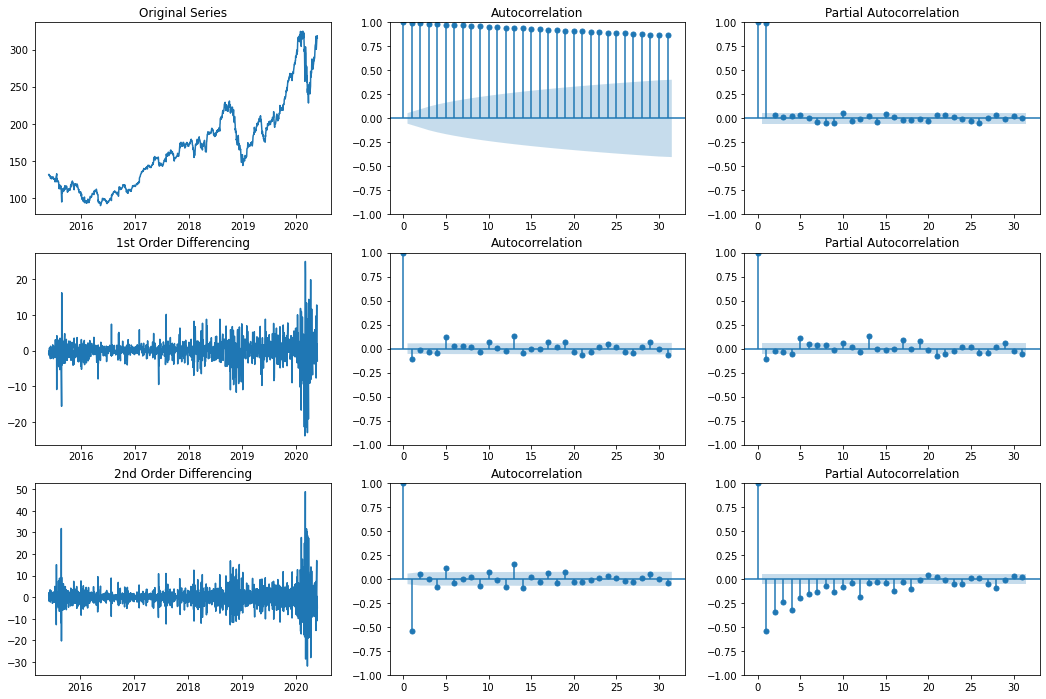

In [17]:
#ACF(Autocorrelation Function)、PACF(Partial Autocorrelation Function) correlogram
fig, axes = plt.subplots(3, 3, figsize=(18,12))
axes[0, 0].plot(df_apple.index,df_apple['open'])
axes[0, 0].set_title('Original Series')
plot_acf(df_apple['open'], ax=axes[0, 1])
plot_pacf(df_apple['open'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df_apple.index,df_apple['open'].diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_apple['open'].diff().dropna(), ax=axes[1, 1])
plot_pacf(df_apple['open'].diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df_apple.index,df_apple['open'].diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_apple['open'].diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(df_apple['open'].diff().diff().dropna(), ax=axes[2, 2])

plt.show()

d=1,q=1or13,p=1or13(用Dickey Fuller test決定d，用ACF,PACF決定pq)

### Determine p,d,q

ARIMA(0,1,0)：MSE=15.617657955019997,MAPE=0.04907871832619154
ARIMA(0,1,1)：MSE=15.097986164484139,MAPE=0.0474218179882092
ARIMA(0,1,2)：MSE=14.956154537230956,MAPE=0.046976388011915775
ARIMA(0,1,3)：MSE=14.653465676187759,MAPE=0.04606084196093645
ARIMA(0,1,4)：MSE=14.748424061841112,MAPE=0.04640633664674336
ARIMA(0,1,5)：MSE=14.098910599361087,MAPE=0.044261342336342005
ARIMA(0,1,6)：MSE=13.805684798351486,MAPE=0.043369250957280635
ARIMA(0,1,7)：MSE=13.603507354104416,MAPE=0.042774681875116176
ARIMA(0,1,8)：MSE=13.767299488691382,MAPE=0.043274564599045176
ARIMA(0,1,9)：MSE=13.849103978974915,MAPE=0.04352560571087381
ARIMA(0,1,10)：MSE=13.033223525618205,MAPE=0.041002720276078486
ARIMA(0,1,11)：MSE=13.036881791145394,MAPE=0.04101335849232095
ARIMA(0,1,12)：MSE=13.242512896837662,MAPE=0.04163308995350184
ARIMA(0,1,13)：MSE=12.29889223296523,MAPE=0.03873259219442903
ARIMA(1,1,0)：MSE=15.231563224408013,MAPE=0.04784332207889307
ARIMA(1,1,1)：MSE=14.817323285690204,MAPE=0.0465463578139617
ARIMA(1,1,2)：MSE=

ARIMA(9,1,8)：MSE=13.000844268236337,MAPE=0.04094554539221034
ARIMA(9,1,9)：MSE=12.555756473334398,MAPE=0.039645127552077435
ARIMA(9,1,10)：MSE=11.365758972113346,MAPE=0.035643735671889706
ARIMA(9,1,11)：MSE=12.627399340011301,MAPE=0.039858847216128576
ARIMA(9,1,12)：MSE=12.471544835002701,MAPE=0.03929199865850396
ARIMA(9,1,13)：MSE=11.982297044394787,MAPE=0.03736709327838307
ARIMA(10,1,0)：MSE=12.909393972011499,MAPE=0.04063885304396123
ARIMA(10,1,1)：MSE=12.176956508862107,MAPE=0.038397876858204456
ARIMA(10,1,2)：MSE=13.143312731432081,MAPE=0.04127078010791836
ARIMA(10,1,3)：MSE=11.914985363134244,MAPE=0.037516708182332735
ARIMA(10,1,4)：MSE=11.964900502515018,MAPE=0.037687785843469004
ARIMA(10,1,5)：MSE=11.918887517947145,MAPE=0.03754032464205085
ARIMA(10,1,6)：MSE=12.166357229179683,MAPE=0.0383672429770979
ARIMA(10,1,7)：MSE=12.016043794276591,MAPE=0.03782617242973252
ARIMA(10,1,8)：MSE=11.941700309825444,MAPE=0.03761390444294511
ARIMA(10,1,9)：MSE=12.12195736694069,MAPE=0.03825545044033254
ARIMA(

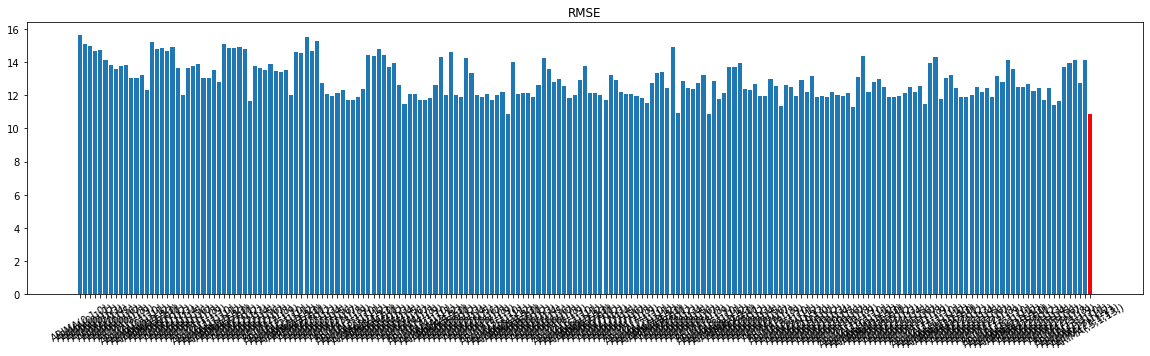

In [18]:
import warnings
warnings.filterwarnings("ignore")

# 用RMSE決定d,p,q
def arima_rmse(data, p=3, d=3, q=3):
    period = 5
    best_pdq =["pdq",10000]
    L =len(data)
    train = data[:(L-period)]
    test = data[-period:]
    rmse_r = []
    mape_ls = []
    name = []
    for i in range(p):
        for j in range(1,d):
            for k in range(q):            
                model = ARIMA(train, order=(i,j,k))
                fitted = model.fit()
                fc = fitted.forecast(period, alpha=0.05)  
                
                rmse = mean_squared_error(test,fc)**0.5
                rmse_r.append(rmse)
                mape = mean_absolute_percentage_error(test,fc)
                mape_ls.append(mape)
                name.append(f"ARIMA({i},{j},{k})")
                print(f"ARIMA({i},{j},{k})：MSE={rmse},MAPE={mape}")
                if rmse < best_pdq[1]:
                    best_pdq[0] = f"ARIMA(,{i},{j},{k},)"
                    best_pdq[1] = rmse
    print("==========================================================================")
    print(f"This best model is {best_pdq[0]} based on argmin RMSE {best_pdq[1]}.")
    plt.figure(figsize=(20,5))
    plt.bar(name, rmse_r)
    plt.bar(best_pdq[0], best_pdq[1], color = "red")
    plt.xticks(rotation=30)
    plt.title("RMSE")
    plt.savefig("Arima RMSE")
    plt.show()
    return [int(i) for i in best_pdq[0].split(',')[1:4]]
# p,d,q = arima_rmse(df_apple['open'], 2,2,2)
p,d,q = arima_rmse(df_apple['open'], 14,2,14)

In [19]:
train = df_apple["open"][:-100]
test = df_apple["open"][-100:]

### Model building and predict

In [20]:
model = ARIMA(train, order=(p,d,q))  
fitted = model.fit()
fc = fitted.forecast(100, alpha=0.05, return_conf_int=True)

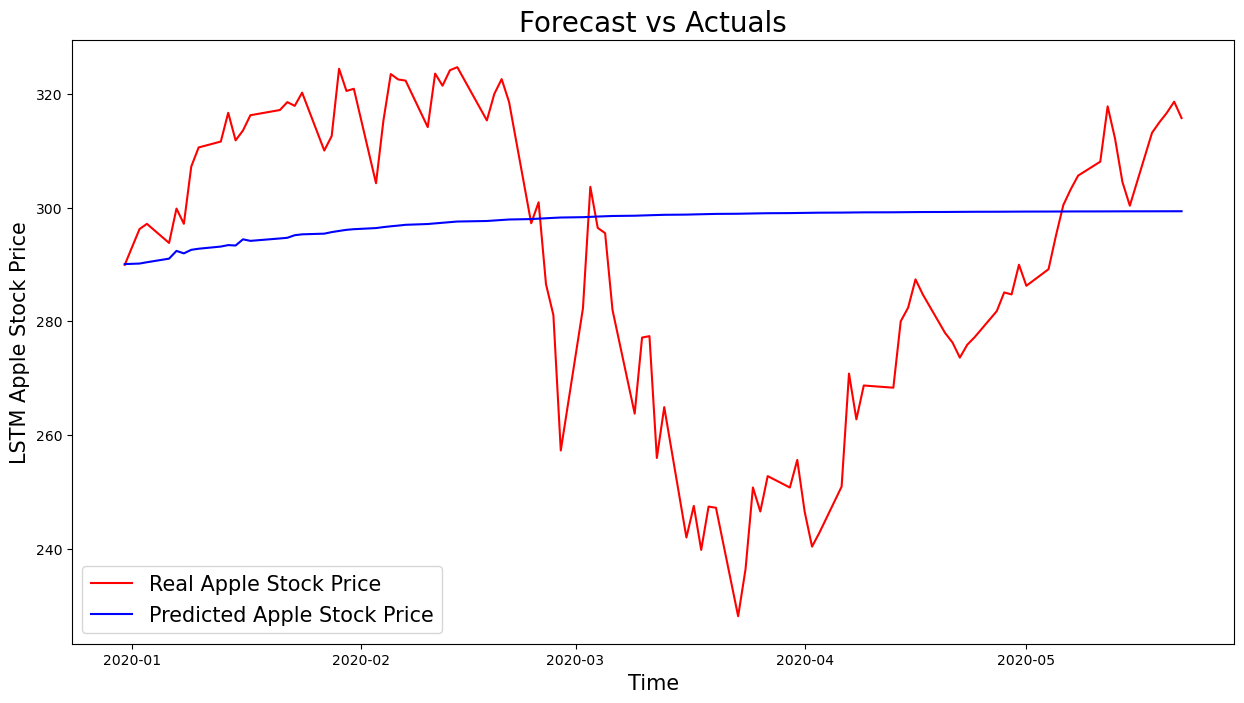

In [21]:
# Plot
plt.figure(figsize=(15,8), dpi=100)
# plt.plot(df_apple.index[:-100],train, label='training')
plt.plot(df_apple.index[-100:],test, color='Red', label='Real Apple Stock Price')
plt.plot(df_apple.index[-100:],fc, color='Blue', label='Predicted Apple Stock Price')
# plt.fill_between(times, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals',fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('LSTM Apple Stock Price',fontsize=15)
plt.legend(loc='lower left', fontsize=15)
plt.show()

### RMSE & MAPE

In [23]:
arima_mape = mean_absolute_percentage_error(df_apple['open'][-100:],fc)*100
print('ARIMA predict |','MAPE: %.2f'%arima_mape,'%',
     'RMSE:',mean_squared_error(df_apple['open'][-100:],fc)**0.5)

ARIMA predict | MAPE: 8.50 % RMSE: 28.32735750722731


## LSTM

### Scaler

In [24]:
from sklearn.preprocessing import MinMaxScaler
# data_np = np.array(df_apple.loc[:,['close', 'high', 'low', 'open', 'volume', 'divCash','yesterday_open', 'UD']])
data_np = np.array(df_apple.loc[:,['open']])

sc = MinMaxScaler()
scal_data = sc.fit_transform(data_np)
scal_data.shape

(1257, 1)

In [25]:
scal_data

array([[0.17833255],
       [0.17564862],
       [0.17552081],
       ...,
       [0.96570528],
       [0.9741405 ],
       [0.96182848]])

In [26]:
# 使用15天的資料預測5天
DAY = 15
PREDICT = 5
timestamp, x_data, y_data = PREDICT, [], []
for i in range(DAY,scal_data.shape[0]-timestamp):
    x_data.append(scal_data[i-DAY: i,:])
    y_data.append(scal_data[i: i+PREDICT,0])
x_data, y_data = np.array(x_data), np.array(y_data)
# y_data = np.reshape(y_data,(y_data.shape[0], y_data.shape[1]))
print('x_data shape',x_data.shape,'\ty_data shape',y_data.shape)

# x_data = scal_data[0:1256]
# y_data = scal_data[1:1257]

# x_data = np.reshape(x_data, (1256,1,1))
# x_data.shape

x_data shape (1237, 15, 1) 	y_data shape (1237, 5)


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [28]:
# !pip install keras

In [29]:
# !pip install tensorflow

### Model building

In [37]:
# First layer
rnn = Sequential()
rnn.add(LSTM(units=256, return_sequences=True,activation='sigmoid',input_shape=(x_data.shape[1], x_data.shape[2])))
rnn.add(Dropout(0.2))
# # Second layer
rnn.add(LSTM(units=128, return_sequences=True))
rnn.add(Dropout(0.2))
# Third layer
rnn.add(LSTM(units=64, return_sequences=True))
rnn.add(Dropout(0.2))
# Fourth layer
rnn.add(LSTM(units=64, return_sequences=True))
rnn.add(Dropout(0.2))
# Fifth layer
rnn.add(LSTM(units=32))#,activation='sigmoid'))
rnn.add(Dropout(0.2))
# output layer
rnn.add(Dense(units=1))#PREDICT))
# Compiling
rnn.compile(optimizer='adam',loss='mean_squared_error')
# rnn.summary()
# Train
# history = rnn.fit(x_data[:-5,:,:], y_data[:-5,:], epochs=300, batch_size=25)
history = rnn.fit(x_data, y_data, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 10s 54ms/step - loss: 0.0665
Epoch 2/100
39/39 [==============================] - 2s 53ms/step - loss: 0.0605
Epoch 3/100
39/39 [==============================] - 2s 53ms/step - loss: 0.0609
Epoch 4/100
39/39 [==============================] - 2s 54ms/step - loss: 0.0613
Epoch 5/100
39/39 [==============================] - 2s 54ms/step - loss: 0.0577
Epoch 6/100
39/39 [==============================] - 3s 68ms/step - loss: 0.0388
Epoch 7/100
39/39 [==============================] - 3s 71ms/step - loss: 0.0176
Epoch 8/100
39/39 [==============================] - 3s 74ms/step - loss: 0.0079
Epoch 9/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0078
Epoch 10/100
39/39 [==============================] - 3s 67ms/step - loss: 0.0062
Epoch 11/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0062
Epoch 12/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0060
Epoch 13/100
39/39 [====

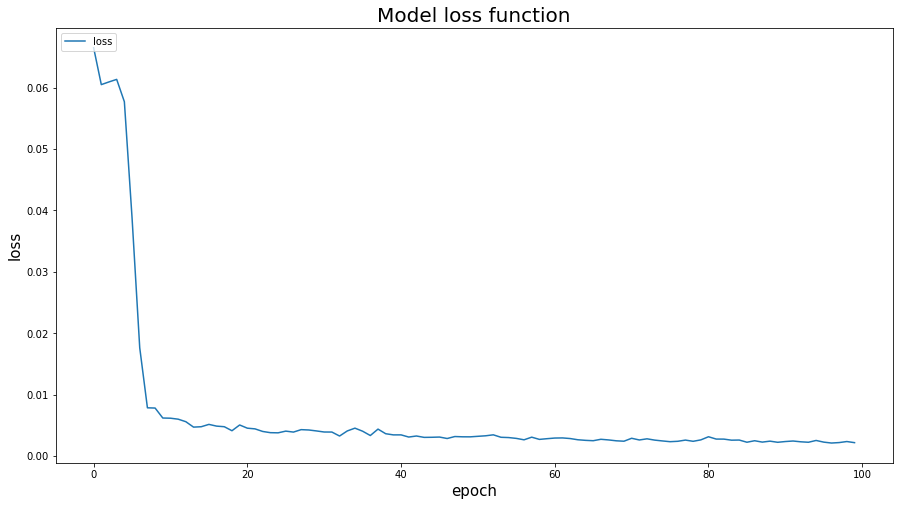

In [38]:
# history.history.keys()
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.title('Model loss function',fontsize=20)
plt.ylabel('loss',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.legend(['loss'], loc='upper left') 
plt.show()

In [39]:
history.history.keys()

dict_keys(['loss'])

In [40]:
predicted_stock_price = rnn.predict(x_data[-100:,:,:])#x_data[:-1,:,:], y_data[:-1,:]

4/4 [==============================] - 2s 18ms/step


In [41]:
pred_inv = predicted_stock_price * (sc.data_max_ -  sc.data_min_) + sc.data_min_

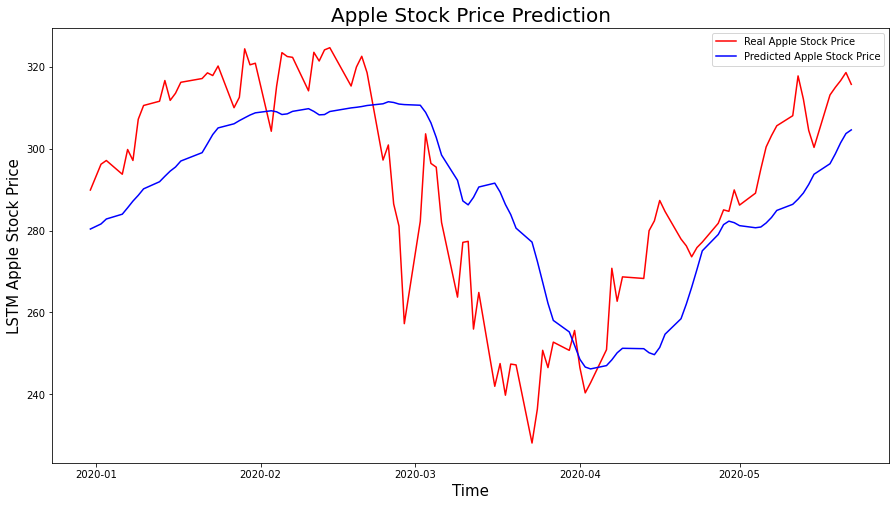

In [42]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(df_apple.index[-100:],df_apple['open'][-100:], color='Red', label='Real Apple Stock Price')
plt.plot(df_apple.index[-100:],pred_inv, color='Blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction',fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('LSTM Apple Stock Price',fontsize=15)
plt.legend()
plt.show()

### RMSE & MAPE

In [43]:
lstm_mape = mean_absolute_percentage_error(df_apple['open'][-100:],pred_inv)*100
print('LSTM predict | ','MAPE: %.2f'%lstm_mape,'%',
     'RMSE:',mean_squared_error(df_apple['open'][-100:],pred_inv)**0.5)

LSTM predict |  MAPE: 5.88 % RMSE: 19.985749161902298
